c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


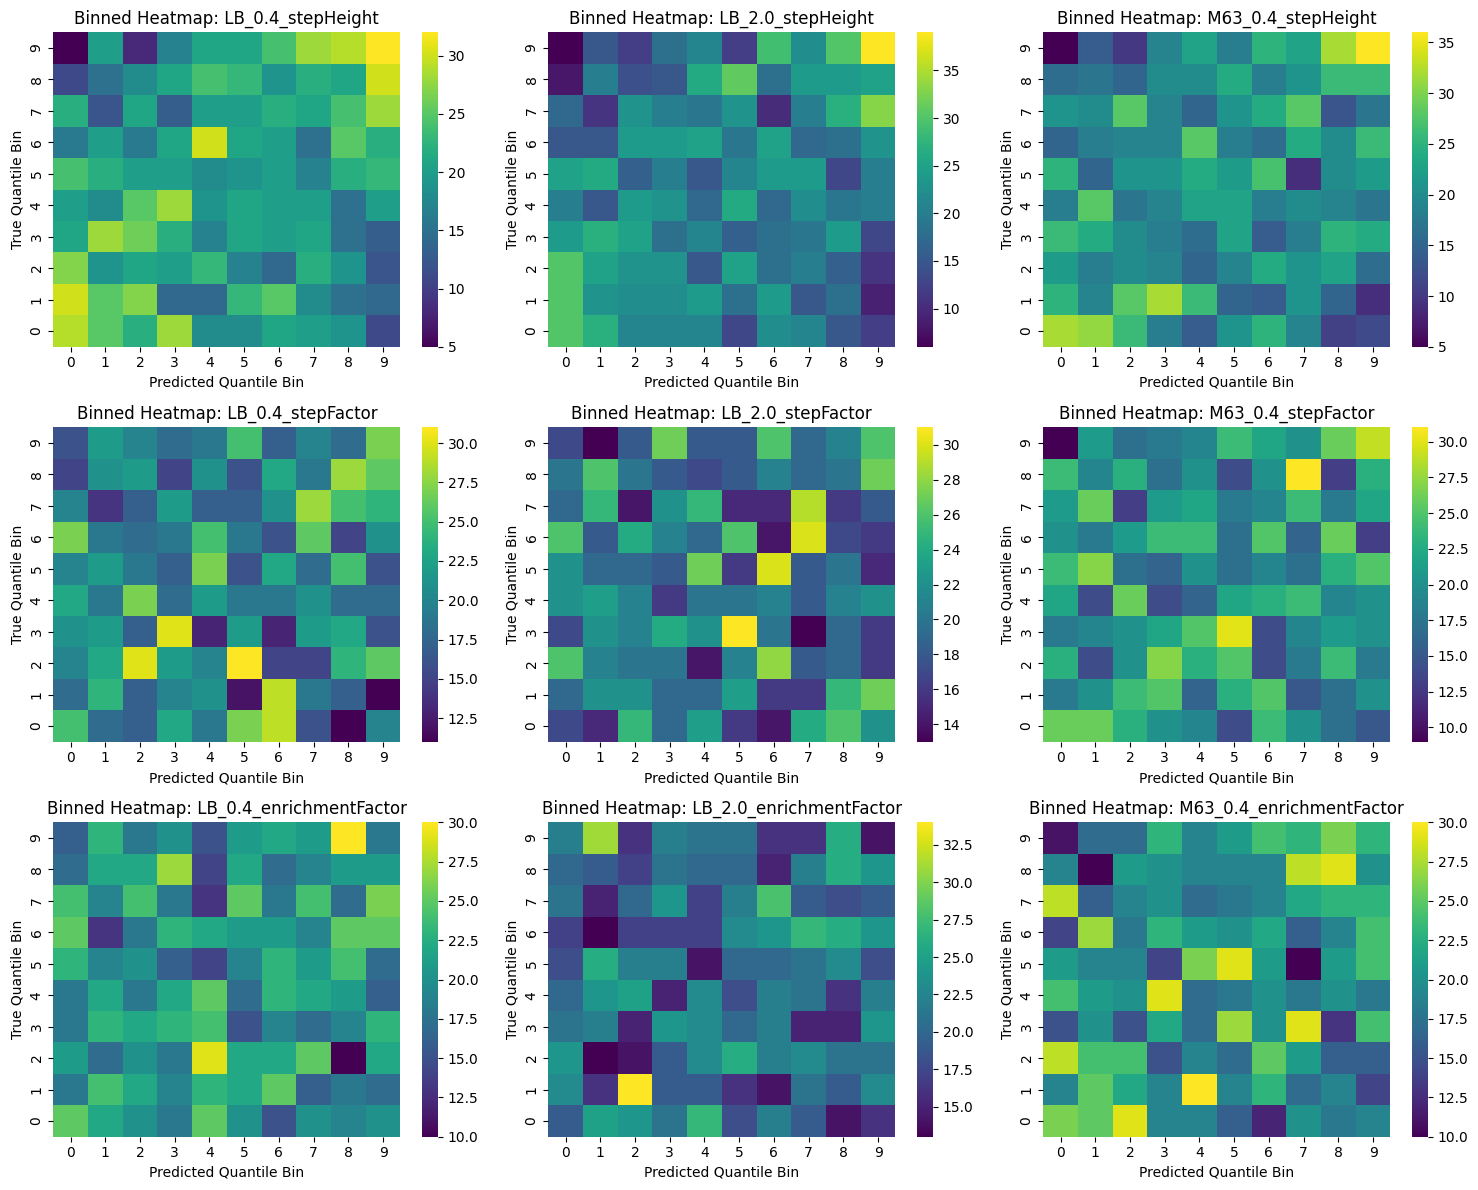

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.saving import load_model  # type: ignore
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer

# -------------------- Data Preprocessing Functions --------------------

def preprocess_sequences(X, max_length=150):
    return np.array([padded_one_hot_encode(seq.zfill(max_length)) for seq in X])

def padded_one_hot_encode(sequence):
    mapping = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], '0': [0, 0, 0, 0]}
    return np.array([mapping[nucleotide.upper()] for nucleotide in sequence])

# Load model and data
model = load_model('Models/CNN_6_1_2.keras')
df = pd.read_csv('Data/Thomasan.csv')

# Remove boolean columns
df = df.drop(columns=['LB_0.4_detected', 'LB_2.0_detected', 'M63_0.4_detected', 'LB_0.4_enriched', 'LB_2.0_enriched', 'M63_0.4_enriched'])

# Remove any row with a value of 100.0
df = df[((df != 100.0) & (df != 0)).all(axis=1)]

# Extract sequences
X_test = df['Sequence']
X_encoded = preprocess_sequences(X_test)

# Predict once
y_pred = model.predict(X_encoded).flatten()

# Quantile transform predicted values
qt_pred = QuantileTransformer(output_distribution='uniform')
y_pred_q = qt_pred.fit_transform(y_pred.reshape(-1, 1)).flatten()

# Set up subplot grid
columns_to_compare = df.columns[1:]  # Exclude 'Sequence'
n_cols = 3
n_rows = int(np.ceil(len(columns_to_compare) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Loop over columns and plot each heatmap
bins = np.linspace(0, 1, 11)

for i, col in enumerate(columns_to_compare):
    y_test = df[col].values
    qt_test = QuantileTransformer(output_distribution='uniform')
    y_test_q = qt_test.fit_transform(y_test.reshape(-1, 1)).flatten()

    y_test_bins = np.digitize(y_test_q, bins) - 1
    y_pred_bins = np.digitize(y_pred_q, bins) - 1
    y_test_bins = np.clip(y_test_bins, 0, 9)
    y_pred_bins = np.clip(y_pred_bins, 0, 9)

    bin_counts = pd.crosstab(y_test_bins, y_pred_bins)

    sns.heatmap(bin_counts, annot=False, fmt="d", cmap="viridis", ax=axes[i])
    axes[i].set_title(f"Binned Heatmap: {col}")
    axes[i].set_xlabel("Predicted Quantile Bin")
    axes[i].set_ylabel("True Quantile Bin")
    axes[i].invert_yaxis()

# Remove extra subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


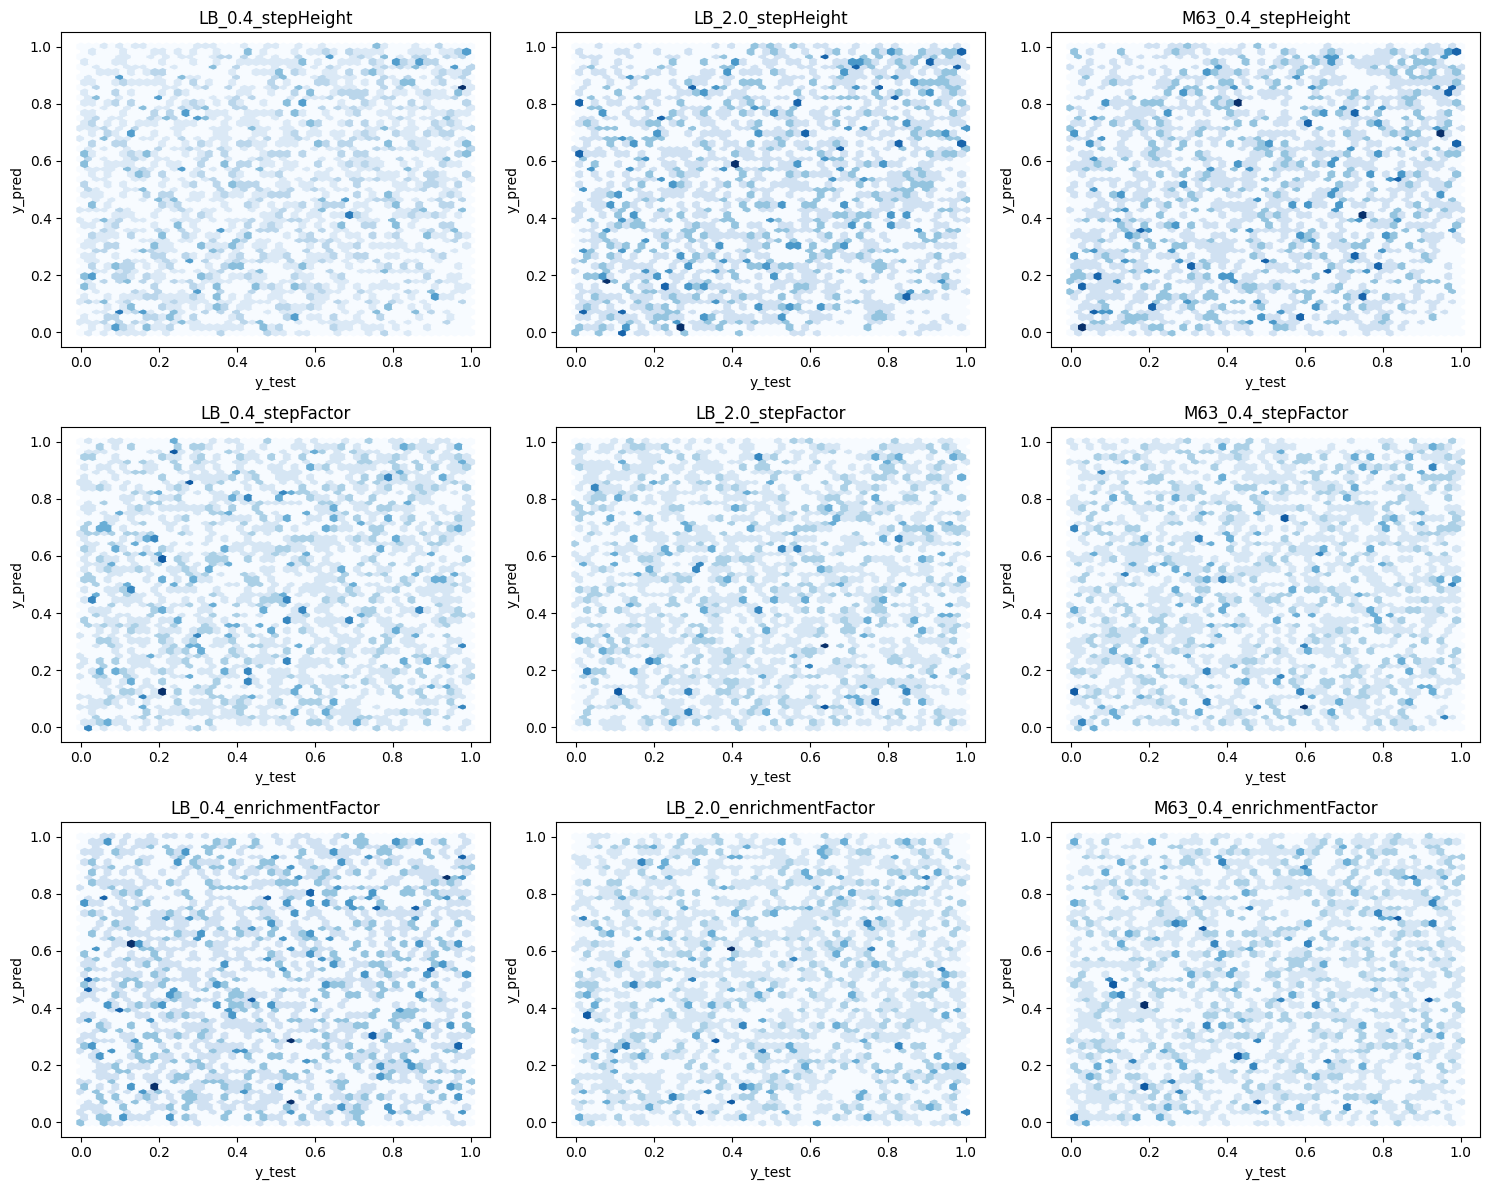

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.saving import load_model  # type: ignore
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer

# -------------------- Data Preprocessing Functions --------------------

def preprocess_sequences(X, max_length=150):
    return np.array([padded_one_hot_encode(seq.zfill(max_length)) for seq in X])

def padded_one_hot_encode(sequence):
    mapping = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], '0': [0, 0, 0, 0]}
    return np.array([mapping[nucleotide.upper()] for nucleotide in sequence])

# Load model and data
model = load_model('Models/CNN_6_1_2.keras')
df = pd.read_csv('Data/Thomasan.csv')

# Remove boolean columns
df = df.drop(columns=['LB_0.4_detected', 'LB_2.0_detected', 'M63_0.4_detected', 'LB_0.4_enriched', 'LB_2.0_enriched', 'M63_0.4_enriched'])

# Remove any row with a value of 100.0 or 0
df = df[((df != 100.0) & (df != 0)).all(axis=1)]

# Extract sequences
X_test = df['Sequence']
X_encoded = preprocess_sequences(X_test)

# Predict once
y_pred = model.predict(X_encoded).flatten()

# Quantile transform predicted values
qt_pred = QuantileTransformer(output_distribution='uniform')
y_pred_q = qt_pred.fit_transform(y_pred.reshape(-1, 1)).flatten()

# Set up subplot grid
columns_to_compare = df.columns[1:]
n_cols = 3
n_rows = int(np.ceil(len(columns_to_compare) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(columns_to_compare):
    y_test = df[col].values
    qt_test = QuantileTransformer(output_distribution='uniform')
    y_test_q = qt_test.fit_transform(y_test.reshape(-1, 1)).flatten()

    # graph y_test vs y_pred
    axes[i].hexbin(y_test_q, y_pred_q, gridsize=50, cmap='Blues')
    axes[i].set_title(col)
    axes[i].set_xlabel('y_test')
    axes[i].set_ylabel('y_pred')


# Remove extra subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


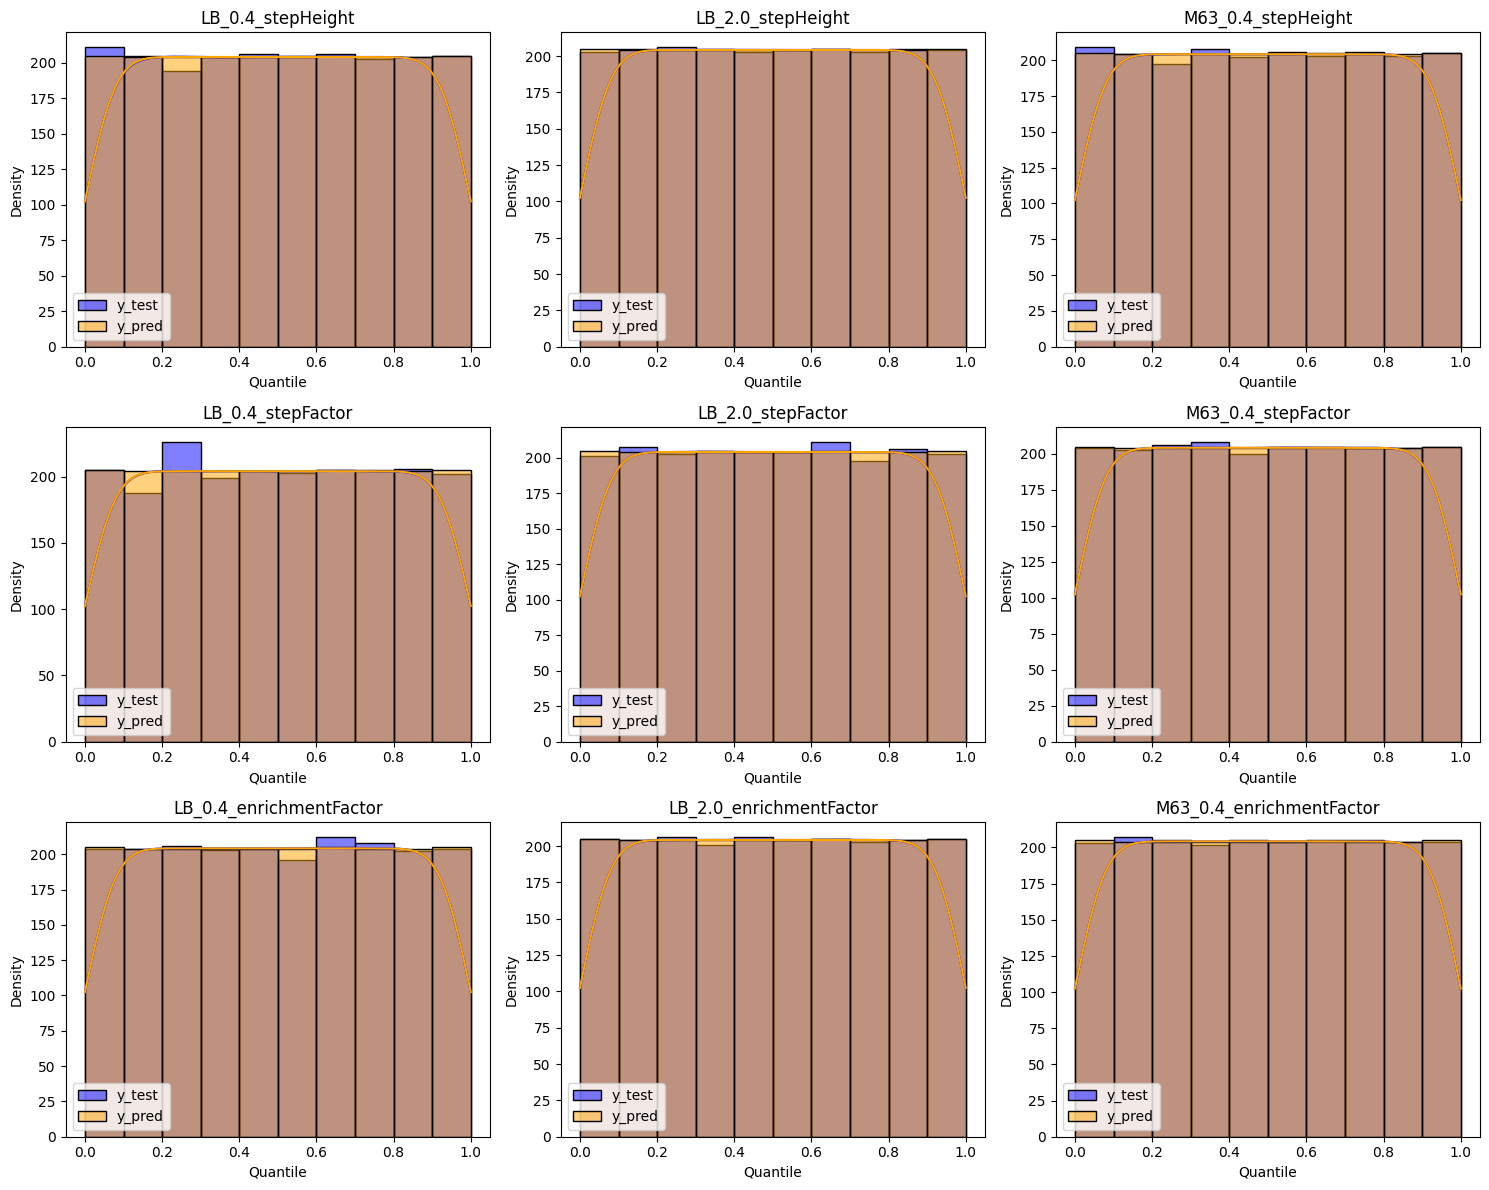

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.saving import load_model  # type: ignore
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer

# -------------------- Data Preprocessing Functions --------------------

def preprocess_sequences(X, max_length=150):
    return np.array([padded_one_hot_encode(seq.zfill(max_length)) for seq in X])

def padded_one_hot_encode(sequence):
    mapping = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], '0': [0, 0, 0, 0]}
    return np.array([mapping[nucleotide.upper()] for nucleotide in sequence])

# Load model and data
model = load_model('Models/CNN_6_1_2.keras')
df = pd.read_csv('Data/Thomasan.csv')

# Remove boolean columns
df = df.drop(columns=['LB_0.4_detected', 'LB_2.0_detected', 'M63_0.4_detected', 'LB_0.4_enriched', 'LB_2.0_enriched', 'M63_0.4_enriched'])

# Remove any row with a value of 100.0 or 0
df = df[((df != 100.0) & (df != 0)).all(axis=1)]

# Extract sequences
X_test = df['Sequence']
X_encoded = preprocess_sequences(X_test)

# Predict once
y_pred = model.predict(X_encoded).flatten()

# Quantile transform predicted values
qt_pred = QuantileTransformer(output_distribution='uniform')
y_pred_q = qt_pred.fit_transform(y_pred.reshape(-1, 1)).flatten()

# Set up subplot grid
columns_to_compare = df.columns[1:]
n_cols = 3
n_rows = int(np.ceil(len(columns_to_compare) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(columns_to_compare):
    y_test = df[col].values
    qt_test = QuantileTransformer(output_distribution='uniform')
    y_test_q = qt_test.fit_transform(y_test.reshape(-1, 1)).flatten()

    # plot the distribution of y_test_q
    sns.histplot(y_test_q, bins=10, kde=True, ax=axes[i], color='blue', label='y_test')
    sns.histplot(y_pred_q, bins=10, kde=True, ax=axes[i], color='orange', label='y_pred')
    axes[i].set_title(col)
    axes[i].set_xlabel('Quantile')
    axes[i].set_ylabel('Density')
    axes[i].legend()


# Remove extra subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
